**Joshua Megnauth**
**Problem set 2**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas.api.types import CategoricalDtype

# Univariate categorical

Categorical data are only countable. Thus, plots of categorical data consist of counts or proportions of the categories.

## Bar plots

Text(0.5, 1.0, 'Pokémon primary type frequency up to generation 8')

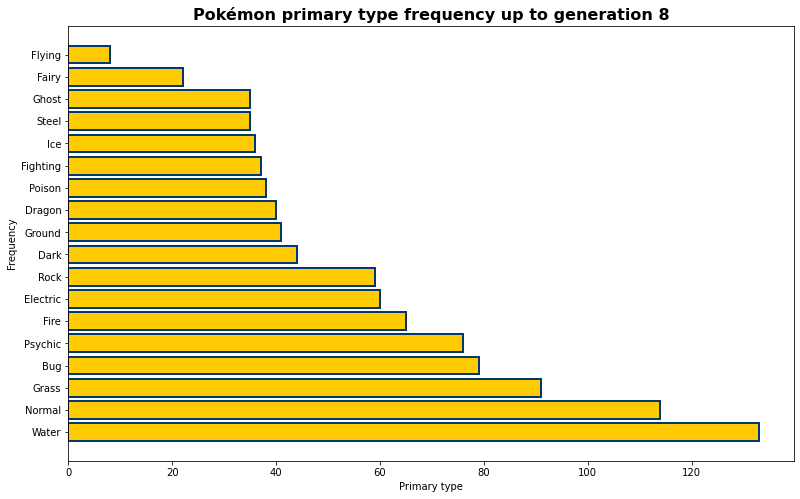

In [2]:
# Pokémon data!!!

# Colors...because I want to make it look like the logo :)
yellow = "#ffcb05"
blue = "#3d7dca"
dark_blue = "#003a70"
nintendo = "#e4000f"
sapphire = "#0f52ba"
ruby = "#e0115f"

# https://bulbapedia.bulbagarden.net/wiki/Category:Color_templates
poketype_colors = {"Water": "#6890F0",
                   "Fire": "#F08030",
                   "Grass": "#78C850",
                   "Electric": "#F8D030",
                   "Ice": "#98D8D8",
                   "Psychic": "#F85888",
                   "Dragon": "#7038F8",
                   "Dark": "#705848",
                   "Fairy": "#EE99AC",
                   "Normal": "#A8A878",
                   "Fighting": "#C03028",
                   "Flying": "#A890F0",
                   "Poison": "#A040A0",
                   "Ground": "#E0C068",
                   "Rock": "#B8A038",
                   "Bug": "#A8B820",
                   "Ghost": "#705898",
                   "Steel": "#B8B8D0",
                   "Unknown": "#68A090"}

# Same link
stat_colors = {"Atk.": "#F08030",
               "Defense": "#F8D030",
               "Sp. Atk.": "#6890F0",
               "Sp. Def.": "#78C850",
               "Speed": "#F85888",
               "Hit Points": "#FF0000",
               "Total (Base)": "#D77AFF"}

# Mosaic colors. I fiddled with the real type colors a bit to
# make up secondary colors.
mosaic_colors = {"Primary": poketype_colors,
                 "Secondary": {
                     "Water": "#089fff",
                     "Fire": "#ff9914",
                     "Grass": "#78c890",
                     "Electric": yellow,
                     "Ice": "#15f4e9",
                     "Psychic": "#e594ad",
                     "Dragon": "#9413f6",
                     "Dark": "#b39a89",
                     "Fairy": "#efc7d0",
                     "Normal": "#7f7f6c",
                     "Fighting": "#981c16",
                     "Flying": "#6f4bdd",
                     "Poison": "#a21aa2",
                     "Ground": "#be9627",
                     "Rock": "#797253",
                     "Bug": "#778217",
                     "Ghost": "#ab9bc5",
                     "Steel": "#9898a0",
                     "Unknown": "#0affba"
                 }}

# Title laziness
title_dict = {"fontweight": "bold", "fontsize": 16}

# https://www.kaggle.com/rounakbanik/pokemon
pokemon_df = pd.read_csv("Pokemon_data.csv",
                        dtype={"type1": "category",
                               "type2": "category",
                               "base_egg_steps": "category",
                               "base_happiness": "category",
                               "is_legendary": "bool",
                               "is_mega": "bool",
                               "is_mythical": "bool"
                              })
# Can't figure out how to specify this in read_csv
pokemon_df.generation = pokemon_df.generation.astype(CategoricalDtype(ordered=True))

bar_fig, bar_ax = plt.subplots(figsize=(13, 8))
poke_primary_type = pokemon_df["type1"].value_counts()
bar_ax.barh(poke_primary_type.index, poke_primary_type,
          color=yellow, edgecolor=dark_blue, linewidth=2)

# Labels
bar_ax.set_xlabel("Primary type")
bar_ax.set_ylabel("Frequency")
bar_ax.set_title("Pokémon primary type frequency up to generation {}".format(pokemon_df.generation.max()),
                **title_dict)

Bar plots count the total number of observations in each category. The plot above shows the frequency of each primary Pokémon type.

Nota bene: the primacy of a type is kind of irrelevant.

Such plots are elegant in their simplicity; the representation of the data is clear and the information expressed is interesting. Counts are intuitive---depending on the topic at least. As a Pokémon fan I did not expect **water** to be the most prevalent primary type. **Flying** is interestingly unrepresented as a primary type while **fairy** is low due to being a fairly new type.

We can eyeball three potential trends: 
* prominent types such as water and normal
* relatively salient types which are everything from rock to bug
* types that are seem unrepresented as primary types

I say "eyeball" because I'm not mathematically proving any of these observations. However, bar plots are great E.D.A. to explore _possible_ trends such as by clustering.

Finally, the fact that my plot is horizontal reveals a potential caveat for bar plots. More categories means more visual clutter which is evident above. Labels overlap with a vertical representation of the same data. Bar plots are great when the categories differ in frequency. Categories of similar length produce cluttered plots that convey little.

## Lollypop and dot plots

Lollypop plots attempt to reduce visual clutter by replacing bars with skinny lines topped by a circle. Data with observations clustered in a small range benefit from the skinny "bars" and conspicuous.

Dot plots are lollypop plots without lines. Unlike bar plots and lollypop plots, we're allowed to restrict the axes of dot plots to zoom into the data without misrepresenting the data. The data are encoded by only dots so restricting axes is not considered malicious (if clearly stated at least). In other words, modifying the axes of dot plots doesn't violate the principal of proportional ink because the data are represented as only the dots.

Text(0.5, 1.0, 'Pokémon primary type frequency up to generation 8')

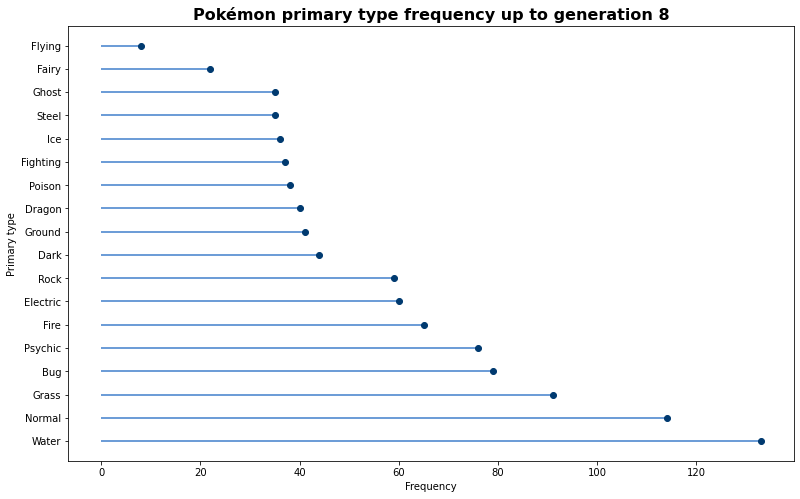

In [3]:
# Following: https://fcpython.com/visualisation/lollipop-charts-in-matplotlib

lolly_fig, lolly_ax = plt.subplots(figsize=(13, 8))

# The first step is to draw N horizontal lines ranging from 0 to the individual data point
# (N = number of categories)
lolly_y_range = np.arange(0, len(poke_primary_type))
# Commenting out the following line renders a dot plot.
lolly_ax.hlines(y=lolly_y_range, xmin=0, xmax=poke_primary_type, color=blue)

# For the next step we have to draw the actual circles
lolly_ax.plot(poke_primary_type, lolly_y_range, 'o', color=dark_blue)

# Next we need to label each y tick.
# To do so we first need to override the tick marks so that they cover the full range
# of the labels.
lolly_ax.set_yticks(lolly_y_range)
# Set the actual labels.
lolly_ax.set_yticklabels(poke_primary_type.index)

# Labels
lolly_ax.set(xlabel="Frequency",
             ylabel="Primary type")
lolly_ax.set_title("Pokémon primary type frequency up to generation {}".format(pokemon_df.generation.max()),
                   **title_dict)

## Pie and doughnut charts

Pie and doughnut charts represent proportions as angles. While the two may be delicious desserts, pie and doughnut charts tend to be inferior to virtually every other method of visualization.

They are difficult to read and messy if more than a couple of categories are present. Visually appraising angles is difficult compared to lengths.

Pie charts should (obviously) add up to 100%. However, overlapping categories in data would lead to misrepresenting the true proportions.

Finally, bar plots are easier to create than pie charts. Thus I can't think of any reason to use either pie/doughnuts; they're for _eating_ not _plotting_.

Text(0.5, 1.0, 'Proportion of special Pokémon')

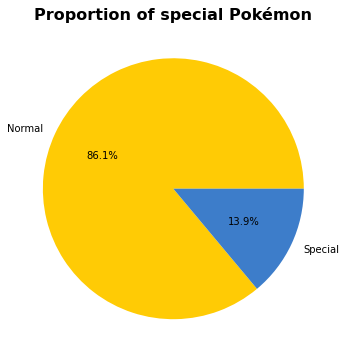

In [4]:
# The ratio of legendary Pokémon to non-legendary is very small, so I'll make a new
# category consisting of Pokémon special in some way.
pokemon_df["is_special"] = pokemon_df.is_legendary | pokemon_df.is_mega | pokemon_df.is_mythical
poke_special = pokemon_df.is_special.value_counts()

pie_fig, pie_ax = plt.subplots(figsize=(8, 6))
pie_ax.pie(x=poke_special, labels=["Normal", "Special"],
           colors=[yellow, blue], autopct = '%1.1f%%')
pie_ax.set_title("Proportion of special Pokémon", **title_dict)

# Bivariate categorical

## Multi panel bar graphs

One technique for representing bi/multivariate relationships is simply graphing both plots side by side as two separate plots. Multi panel plots may be difficult to compare with many categories since our eyes need to scan both plots to compare heights relatively. Like bar graphs in general, the separate plots may look cluttered with a lot of categories.

The plot below is likely too colorful, but using the official type colors is worth the clutter! (I hope).

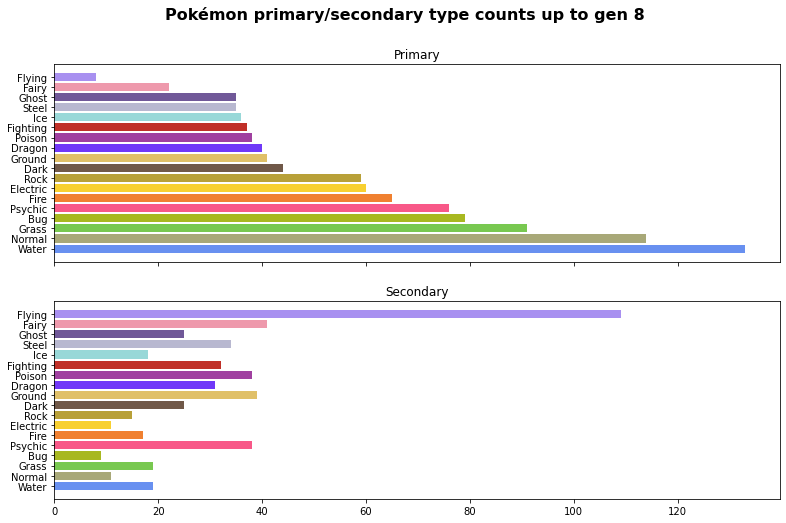

In [5]:
# Some of the observations are labeled as "None."
# I'm not removing these observations because they're not missing values.
# Not having a secondary type is a valid status.
# However I'll filter it out to plot because the actual difference
# in numbers between primary/secondary should be clear.
poke_secondary_type = pokemon_df["type2"].value_counts()

# Merge the primary/secondary type DataFrames
poke_types = pd.merge(poke_primary_type.reset_index(), poke_secondary_type.reset_index(),
                     how="outer")

# Fix ugly column names
poke_types.columns = ["Type", "Primary", "Secondary"]

# No Pokémon are missing primary types. However, None is set to NaN so
# I'll just fix that up here.
poke_types.loc[poke_types.Type == "None", "Primary"] = 0

# Tidy
poke_types = pd.melt(poke_types, id_vars=["Type"],
                     var_name="Primacy", value_name="Freq")

# And now we plot!
mpanel_fig, mpanel_axes = plt.subplots(2, figsize=(13, 8), sharex=True)
# I'd like to leave "None" in the other DataFrame in case I need it for anything.
# But sharex without "None" conveys the same information without requiring two 
# different x axes. Plus, having 400+ "None" for Secondary looks messy without adding much.
poke_types_plot = poke_types[poke_types.Type != "None"]
mpanel_fig.suptitle("Pokémon primary/secondary type counts up to gen {}".format(pokemon_df.generation.max()),
                   **title_dict)

for primacy, ax in zip(poke_types_plot.Primacy.unique(), mpanel_axes):
    type_df = poke_types_plot[poke_types_plot.Primacy == primacy]
    ax.barh(type_df.Type, type_df.Freq,
            color=[poketype_colors[poketype] for poketype in type_df.Type])
    
    # Labels et cetera
    ax.set_title(primacy)

## Grouped bar plots

Grouped bar graphs may present patterns clearer than multi panel plots as the comparable bars are in close proximity. For example, we see that types such as **water**, **grass**, **normal** et cetera are often primary types but are proportionally lower as secondary types. **Flying** is the least prevalent primary type but the most prevalent secondary type. (I honestly wouldn't have known that fact without a graph and/or math.)

Text(0.5, 1.0, 'Pokémon primary/secondary type ratios up to gen 8')

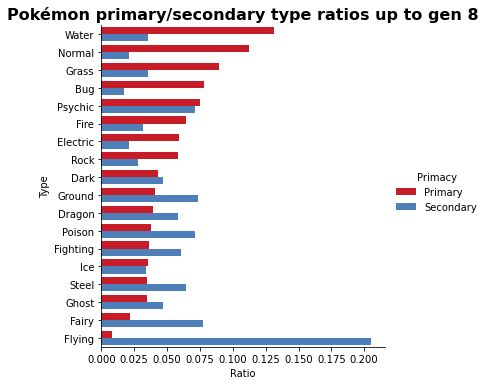

In [6]:
# Let's calculate type ratios per type primacy!
prim_freq = poke_types_plot.groupby("Primacy")["Freq"].sum()
# Note that I'm using the variable without "Nones"
poke_types_props = poke_types_plot.copy()
poke_types_props["Ratio"] = poke_types_plot.apply(lambda row: row.Freq/(prim_freq[row.Primacy]),
                                                  axis="columns")

facet_grouped = sns.catplot(x="Ratio", y="Type",
                            hue="Primacy",
                            kind="bar",
                            data=poke_types_props,
                            palette={"Primary": nintendo,
                                     "Secondary": blue
                                    })

facet_grouped.ax.set_title("Pokémon primary/secondary type ratios up to gen {}".format(pokemon_df.generation.max()),
                           **title_dict)

## Stacked bar plots

Stacked bar plots, as the name implies, stacks the bars on top of each other per the grouping category. For example, the two bars for each type would be coalesced into one stacked bar each. Stacked bars are difficult to read as we need to compare bar heights relatively rather than absolutely.

## Mosaic plots

Mosaic plots encode categorical data by the size of rectangles. In other words, the first categorical variable is encoded by the width of the rectangle while the second is encoded via the length.

The mosaic plot below displays the same information as the bar plot above. One major caveat is that mosaic plots are difficult to construct. The plot below required setting colors manually for both Primary and Secondary types. Another caveat is that distinguishing the sizes of the rectangles is difficult. For example, I'm unable to tell the relative widths between types with similar widths---such as **water** and **normal** as well as **flying**.

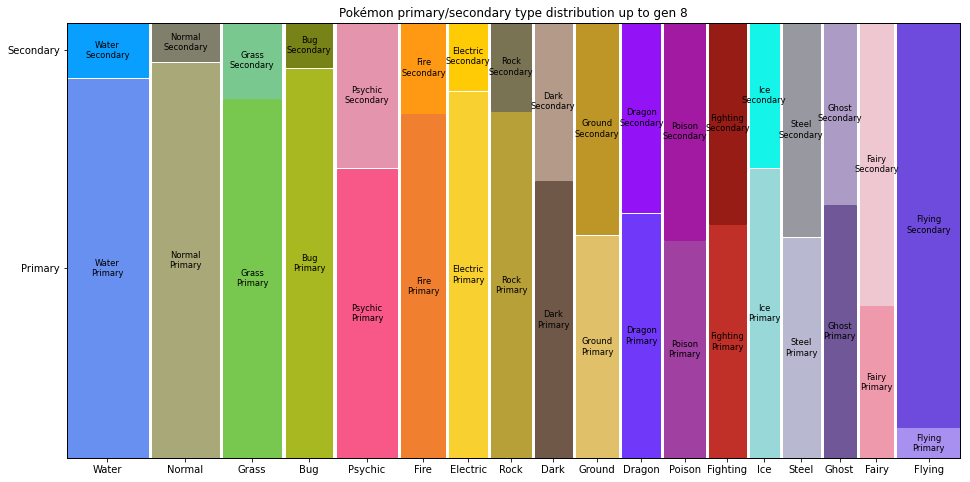

In [7]:
from statsmodels.graphics.mosaicplot import mosaic

poke_types_plot_mosaic = poke_types_plot.set_index(["Type", "Primacy"])
mos_fig, mos_ax = plt.subplots(figsize=(16, 8))

# https://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html
# The colors are supposed to be different, so I played with the actual type colors a bit
# to produce the Secondary colors.
# The properties parameter calls a function that passes in a tuple with (Cat1, Cat2) [i.e.
# ("Water", "Secondary")].
 
_ = mosaic(poke_types_plot_mosaic.Freq, ax=mos_ax,
           properties=lambda rect: {"color": mosaic_colors[rect[1]][rect[0]]},
           title="Pokémon primary/secondary type distribution up to gen {}".format(pokemon_df.generation.max()))

## Tree maps

Tree maps are designed for hierarchical data. The example on the [Plotly](https://plotly.com/python/treemaps/) site plots continents with states colored by life expectancy. Continents are at the top of the hierarchy while states are under continents. Hue intensity per country indicates life expectency.

## Parallel categories

Parallel categories plots consist of a map that traverses the flows of categories. For example, in the plot below we can see individual lines spanning out from the generations indicating each Pokémon introduced in that generation. Those lines flow out to the primary type of each of those Pokémon then to their secondary type followed by their egg steps group et cetera. Of course with so many lines/categories we can only _sort of_ see trends.

In [8]:
# Plotly uses all variables with a "cardinality" less than fifty. However, that
# seriously breaks with this data set because of a set of variables that measure
# damage effectiveness per type.
# Also...include base stats.
poke_para_cats = pokemon_df[["generation", "type1", "type2", "base_egg_steps",
                             "base_happiness", "is_legendary", "is_mythical",
                             "is_mega", "base_total"]]

# Rename the columns so I can be lazy with names.
poke_para_cats.columns = ["Generation", "Primary type", "Secondary type", "Egg group",
                          "Base happiness", "Legendary", "Mythical", "Mega", "Base stats"]

px.parallel_categories(poke_para_cats, color="Base stats",
                       title="Pokémon type divergence by base total stats",
                       color_continuous_scale=px.colors.sequential.Viridis)

# Numerical data

Essentially every mathematical operation is valid for numerical data. Rather than being stuck with counts we're able to simply do _more_ with continuous data.

So of course we should start with counts, again!
## Histograms

I like to think of histograms as bar plots for numerical data. Like bar plots we're dealing with frequencies, but unlike bar plots we can't simply count numerical data. For example, let's say we had a range of data points from 0 to 100. We'd need a bar for each number even if they're, say, 42.02 and 42.03. Histograms bin data so that a range of numbers fall into each bin. The bin height is the count within the bin.

Bin sizes must be tuned which is perhaps the most difficult part of drawing histograms.

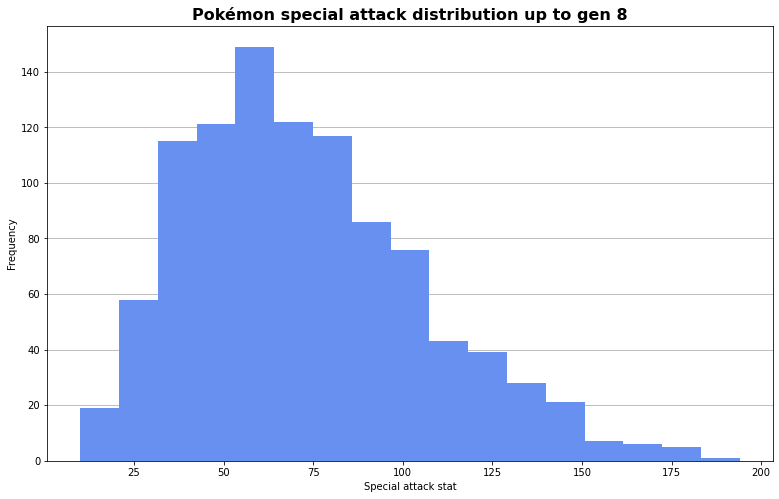

In [9]:
hist_fig, hist_ax = plt.subplots(figsize=(13, 8))

# 17 bins seems okay
hist_ax.hist(pokemon_df.sp_attack,
             bins=17,
             color=stat_colors["Sp. Atk."])

# Labels and aesthetics
hist_ax.set(xlabel="Special attack stat",
            ylabel="Frequency")
hist_ax.set_title("Pokémon special attack distribution up to gen {}".format(pokemon_df.generation.max()),
                  **title_dict)
hist_ax.grid(axis='y')
hist_ax.set_axisbelow(True)

## Density

Density plots visualize the probability distribution of a set of observations rather than only binning counts. Some data are estimated because a raw value may not exist. Density plots require tuning in the form of _bandwidth_ which determines how aggressive the kernel is at estimating and smoothing the data.

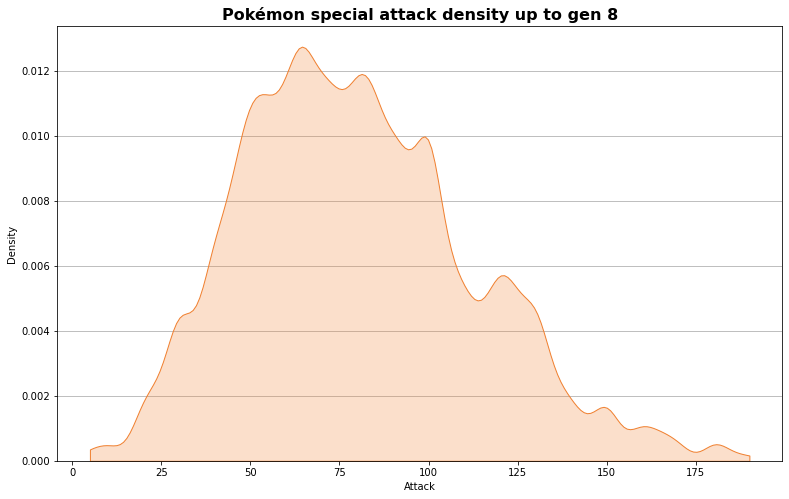

In [10]:
dens_fig, dens_ax = plt.subplots(figsize=(13, 8))

sns.kdeplot("attack",
            cut=0,
            ax=dens_ax,
            bw_adjust=.42,
            color=stat_colors["Atk."],
            fill=True,
            data=pokemon_df)

dens_ax.set_xlabel("Attack")
dens_ax.set_title("Pokémon special attack density up to gen {}".format(pokemon_df.generation.max()),
                  **title_dict)
dens_ax.grid(axis='y')
dens_ax.set_axisbelow(True)

## Box plot

Box plots visualize quartiles, quartile bookends, and values that fall outside of the bookends. The box contains the interquartile range which is the first, median, and third quartiles. The bookends or whiskers span 1.5 times the IQR. Values outside of this range are considered outliers.

Box plots, unlike scatter plots, don't visualize all of the data. General trends may be misleading such as if the IQR hides multiple modes. 

Text(0.5, 1.0, 'Base stats range for Pokémon up to gen 8')

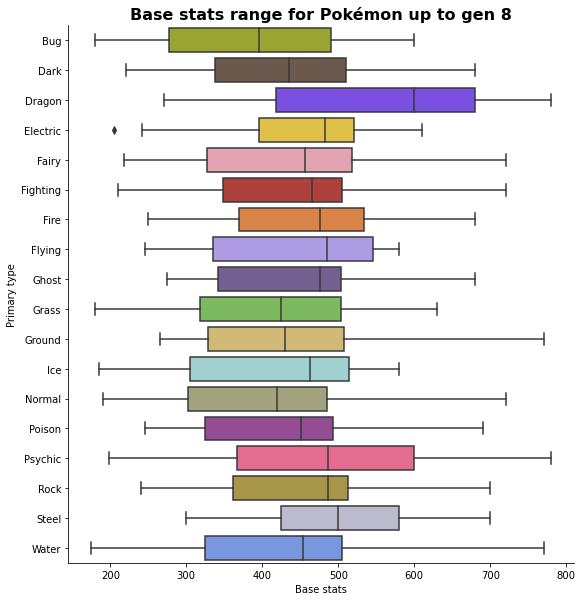

In [11]:
box_facet = sns.catplot(x="base_total",
                        y="type1",
                        data=pokemon_df,
                        kind="box",
                        palette=poketype_colors,
                        height=8)

# Labels
box_facet.ax.set(xlabel="Base stats", ylabel="Primary type")
box_facet.ax.set_title("Base stats range for Pokémon up to gen {}".format(pokemon_df.generation.max()),
                       **title_dict)

## Violin plots
Violin plots are essentially box plots with a KDE mapped onto the range of the data. Violin plots provide much more information than a box plot because the static IQR box and whiskers are replaced with the density.

For example, the violin plots of selected types show greater variation than what is evident by the box plots.

The potential caveats of violin plots are essentially the same as with density plots. Data may be simulated beyond the actual range and bandwidth may need to be tuned.

Text(0.5, 1.0, 'Base stats range for Pokémon up to gen 8')

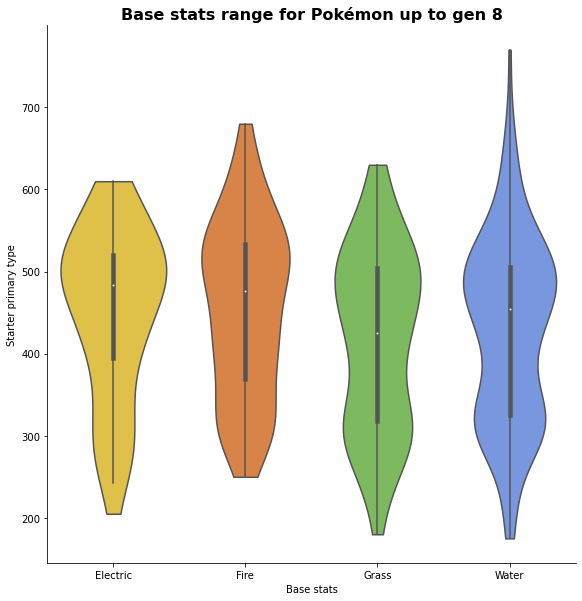

In [12]:
starter_types = pokemon_df[pokemon_df.type1.isin(["Water",
                                                  "Grass",
                                                  "Fire",
                                                  # Because Pokemon Yellow.
                                                  "Electric"])]
# Remove newly missing categories for cleaner plotting.
starter_types.type1.cat.remove_unused_categories(inplace=True)

vio_facet = sns.catplot(x="type1",
                        y="base_total",
                        data=starter_types,
                        kind="violin",
                        palette=poketype_colors,
                        height=8,
                        cut=0)

# Labels
vio_facet.ax.set(xlabel="Base stats", ylabel="Starter primary type")
vio_facet.ax.set_title("Base stats range for Pokémon up to gen {}".format(pokemon_df.generation.max()),
                       **title_dict)

# Bivariate numerical visualizations

## Scatter plots

Scatter plots map two variables onto a 2D plane (or more variables onto higher order planes). For example, in terms of the Pokémon data we can map the Defense stat onto the x axis and Attack onto y to observe how Attack changes at different values of Defense. In fact, let's do that now!

The Attack versus Defense plot shows the base attack stat in relation to defense. You may notice that one major problem is overplotting or the tendency for our points to overlap or cluster. Overplotting may be solved by adding random jitter to each point so the points cluster less. Setting an alpha channel also helps as overplotting would be more visible as darker points.

Text(0.5, 1.0, 'Attack vs. Defense stats for Pokémon up to gen 8')

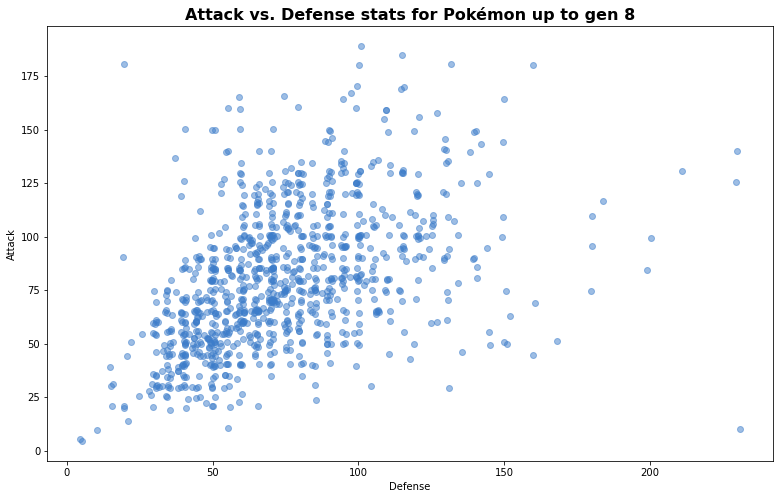

In [13]:
scatter_fig, scatter_ax = plt.subplots(figsize=(13, 8))

sns.regplot(x="defense",
            y="attack",
            data=pokemon_df,
            x_jitter=True,
            y_jitter=True,
            fit_reg=False,
            color=blue,
            scatter_kws={"alpha": 0.5},
            ax=scatter_ax
           )

# Labels
scatter_ax.set(xlabel="Defense", ylabel="Attack")
scatter_ax.set_title("Attack vs. Defense stats for Pokémon up to gen {}".format(pokemon_df.generation.max()),
                     **title_dict)

## Hexbins plot

Another possible solution to overplotting is to bin observations. The bins may be plotted as a shape, such as a hexagon, onto 2D space where hue intensity represents more observations in a bin.

Text(0.5, 1.0, 'Attack vs. Defense stats for Pokémon up to gen 8')

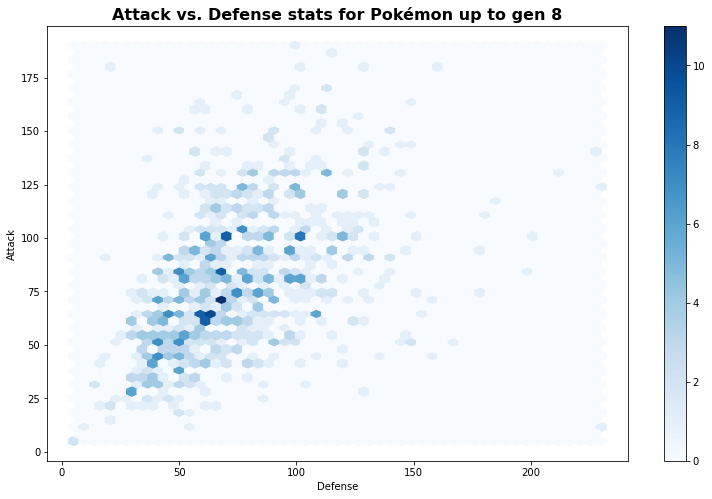

In [14]:
hex_fig, hex_ax = plt.subplots(figsize=(13, 8))

hex_plot = hex_ax.hexbin(pokemon_df.defense,
                         pokemon_df.attack,
                         gridsize=50,
                         cmap=plt.cm.Blues)
# Labels and friends
hex_fig.colorbar(hex_plot)
hex_ax.set(xlabel="Defense", ylabel="Attack")
hex_ax.set_title("Attack vs. Defense stats for Pokémon up to gen {}".format(pokemon_df.generation.max()),
                 **title_dict)

## Multidimensional plots

Visualizing more than two variables requires mapping data onto more aesthetics to add dimensions. Adding color as either discrete (to represent nominal variables) or a gradient (to map a continuous variable) to a 2D plot essentially adds a third dimension.

### Bubble plots
Bubble plots add a third dimension via size.

Text(0.5, 1.0, 'Attack, Defense, and Speed stats for Pokémon up to gen 8')

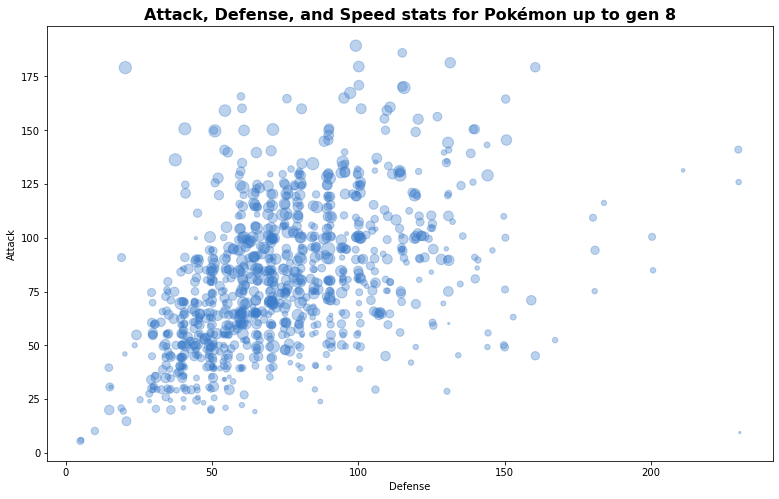

In [15]:
bub_fig, bub_ax = plt.subplots(figsize=(13, 8))

sns.regplot(x="defense",
            y="attack",
            data=pokemon_df,
            x_jitter=True,
            y_jitter=True,
            fit_reg=False,
            color=blue,
            scatter_kws={
                "alpha": 0.35,
                "s": pokemon_df.speed},
            ax=bub_ax
           )

# Labels
bub_ax.set(xlabel="Defense", ylabel="Attack")
bub_ax.set_title("Attack, Defense, and Speed stats for Pokémon up to gen {}".format(pokemon_df.generation.max()),
                 **title_dict)

### Scatter plot matrix
Scatter plot matrices plot each combination of continuous variables in order to visualize each set of relationships.

(I'll only visualize stats/height/weight as a matrix below though).

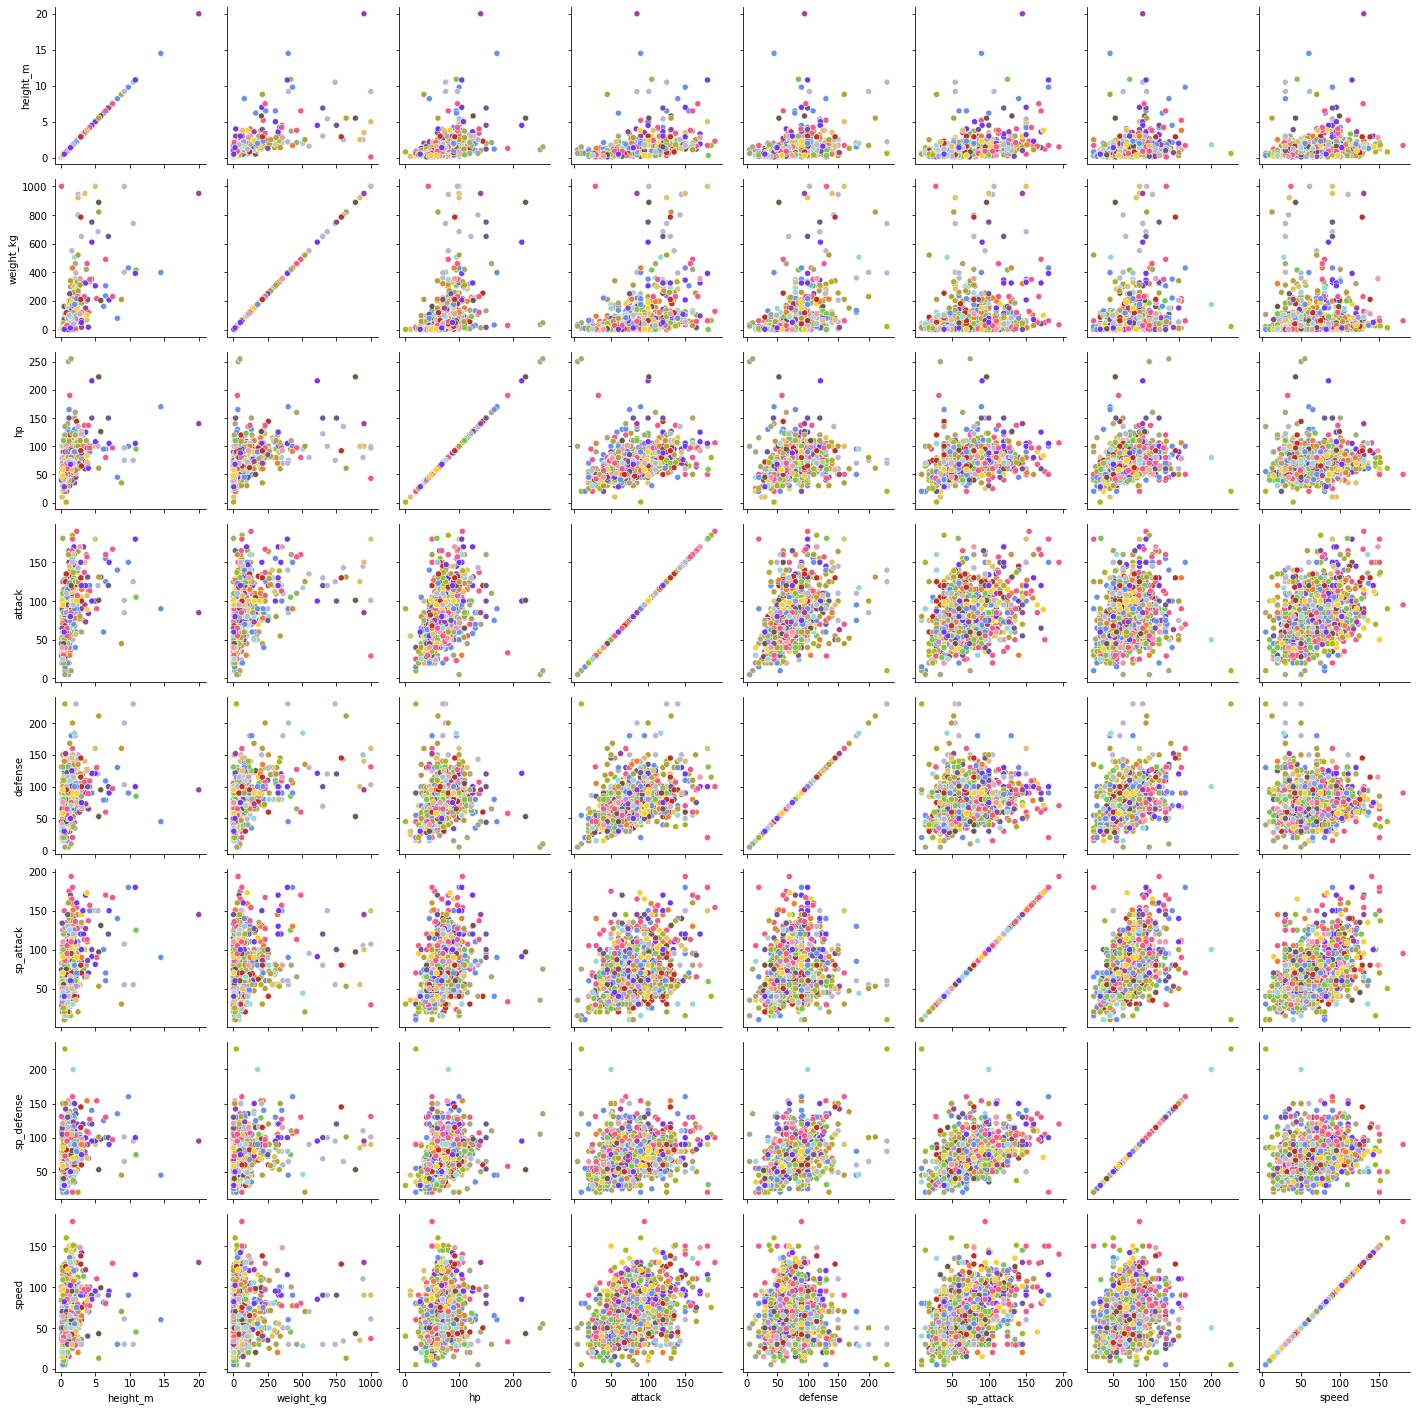

In [16]:
scatter_matrix = sns.PairGrid(pokemon_df, hue="type1", palette=poketype_colors,
                             vars=["height_m", "weight_kg", "hp", "attack",
                                   "defense", "sp_attack", "sp_defense", "speed"])
scatter_matrix.map(sns.scatterplot)

### Heat map

Heat maps plot hue intensity based on values. The values may be the actual observations or a statistic such as correlation coefficient. Heat maps are used to avoid the unreadable mess above.

# Time series

Time series visualizations often have many moving parts. Line plots may be used to visualize trends (y axis) per time unit (x axis). Time units per data set vary in terms of discreteness. For example, data may be gathered on a daily, weekly, monthly, yearly, et cetera basis. Certain fields may gather more granular data such as on the second or minute level.

Visualizing time series data essentially always requires some cognizance of the unit. For example, a very peaky distribution may hide trends. Taking a rolling window plus a summary statistic (such as a rolling average) may smooth out the data by reducing the noise. Rolling windows are [trivial to calculate in Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html).

We may also face the opposite problem; id est if we lack data points then line plots would misrepresent the actual data.

With that said, I don't have time series Pokémon data.

# Geospatial data

Choropleths encode data as colors overlaid on a map. For example, we may plot population density of U.S. districts on a map that actually displays those districts. Choropleths work best with data normalized by population (density, essentially). States such as Wyoming are sparsely populated. Plots that encode static values across large geographical units misrepresent reality whereas density corrects for geographical size by properly shifting color intensity by another unit, such as people. An alternative solution is to encode static values onto smaller geographical units.